In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

def new_comparison(dfs_to_compare,criteria,index_names):
    df = pd.DataFrame()
    j = 0
    for i in index_names:
        df[i] = dfs_to_compare[j][criteria]
        j = j +1
    return df

#FUNCION PARA CONVERTIR FECHA A DIA DE LA SEMANA
def fecha_a_dia(dia):
    return calendar.day_name[dia.weekday()]

#dias = {'day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],}
#df_dias = pd.DataFrame(dias,columns=['day_of_week'])
#df_dias['numbers'] = [0]
#df_dias['rep'] = 0

#def day_rep(df_dias, df){
# SI DF.DIA NO ESTA EN DF_DIAS[DF.DIA_DE_SEMANA].NUMEROS => DF_DIAS[DF.DIA_DE_SEMANA].REP ++
    

In [2]:
#LEO CSV DETALLANDO LOS TIPOS POR COLUMNA
types = {'advertiser_id':'int8',
         'action':'category',
         'source_id':'int8',
         'latitude':'float64',
         'created':'object',
         'longitude':'float64',
         'wifi_connection':'category',
         'carrier_id':'float64',
         'trans_id':'object',
         'os_minor':'float',
         'agent_device':'float',
         'os_mayor':'float64',
         'specs_brand':'category',
         'brand':'float64',
         'timeToClick':'float64',
         'touchX':'float64',
         'touchY':'float64',
         'ref_type':'category',
         'ref_hash':'int64'}
clicks = pd.read_csv('../../../datos_tp/clicks.csv', dtype = types)

In [3]:
#CASTEO LA FECHA
clicks['created'] = pd.to_datetime(clicks['created'], format= '%Y-%m-%d %H:%M:%S')
clicks.dtypes

advertiser_id                int8
action_id                 float64
source_id                    int8
created            datetime64[ns]
country_code                int64
latitude                  float64
longitude                 float64
wifi_connection          category
carrier_id                float64
trans_id                   object
os_minor                  float64
agent_device              float64
os_major                  float64
specs_brand              category
brand                     float64
timeToClick               float64
touchX                    float64
touchY                    float64
ref_type                 category
ref_hash                    int64
dtype: object

In [4]:
#APLICO FUNCION AL DATA FRAME

clicks['day_of_week'] = clicks['created'].map(fecha_a_dia)
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,day_of_week
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093,Wednesday
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,Friday
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647,Friday
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525,Wednesday
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525,Wednesday


,counts
day_of_week,
Friday,2839
Monday,4557
Saturday,3283
Sunday,3966
Thursday,2989
Tuesday,5204
Wednesday,3468


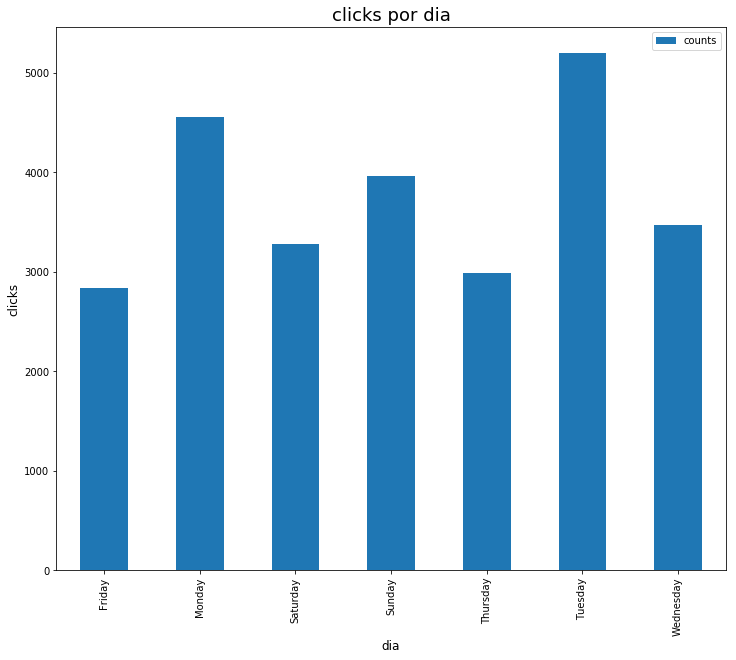

In [105]:
#PLOTEO CANTIDAD DE CLICKS POR DIA DE LA SEMANA
clicks['day'] = clicks['created'].apply(lambda x: x.day)

#SACO DIAS 5 y 6
clicks = clicks.loc[((clicks.day != 5) & (clicks.day != 6))]

clicks['counts'] = 1
days_group = clicks.groupby('day_of_week').agg({'counts':'sum'})
days_group.rename(columns={'counts':'clicks'})
ord = pd.Series([5,1,6,7,4,2,3])
#days_group['ord'] = ord
#days_group.sort_values(by='ord',inplace=True)
#days_group.drop(columns='ord',inplace=True)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
days_group.plot.bar(ax=ax)
ax.set_xlabel('dia',fontsize=12)
ax.set_ylabel('clicks',fontsize=12)
ax.set_title('clicks por dia', fontsize=18)
days_group

In [8]:
clicks.loc[((clicks['day_of_week'] == "Saturday") | (clicks['day_of_week'] == "Sunday")), 'weekend'] = True
clicks.loc[((clicks['day_of_week'] != "Saturday") & (clicks['day_of_week'] != "Sunday")), 'weekend'] = False


Text(0.5, 0, 'hora')

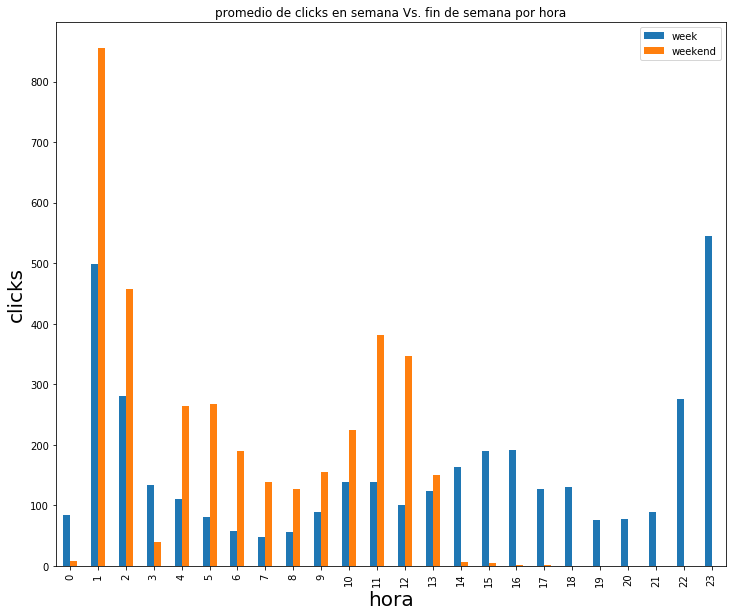

In [23]:

clicks['hour'] = clicks['created'].apply(lambda x: x.hour)
week_hg = clicks.loc[clicks.weekend==False].groupby(['hour']).agg({'counts':'sum'})
week_hg.counts = (week_hg.counts)/5
weekend_hg = clicks.loc[clicks.weekend==True].groupby(['hour']).agg({'counts':'sum'})
weekend_hg.counts = (weekend_hg.counts)/2

comparison = new_comparison([week_hg,weekend_hg],'counts',['week','weekend'])

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_ylabel('clicks', fontsize=20)

comparison.plot.bar(figsize=(12,10), title='promedio de clicks en semana Vs. fin de semana por hora', ax=ax)
ax.set_xlabel('hora', fontsize=20)

In [25]:
counts = pd.Series([week_hg.counts.sum(),weekend_hg.counts.sum()])
counts.set_index(['week','weekend'])
ax = counts.plot.bar(title = 'Week Vs. Weekend')
ax.set_xlabel('')
ax.set_ylabel('normalized_clicks')


AttributeError: 'Series' object has no attribute 'set_index'

In [26]:
ev_types = {'event_id':'int64',
            'ref_type':'category',
            'ref_hash':'int64',
            'application_id':'int64',
            'attributed':'bool',
            'device_countrycode':'category',
            'device_os_version':'float64',
            'device_brand':'float64',
            'device_model':'float64',
            'device_city':'float64',
            'session_user_agent':'float64',
            'trans_id':'category',
            'user_agent':'float64',
            'event_uuid':'object',
            'carrier':'float64',
            'kind':'float64',
            'device_os':'category',
            'wifi':'category',
            'connection_type':'category',
            'ip_address':'int64',
            'device_language':'float64'}

events = pd.read_csv('../../../datos_tp/events.csv', dtype = ev_types)

In [27]:
cl_ev = clicks.merge(events, on='ref_hash',how='inner')
cl_ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23607 entries, 0 to 23606
Data columns (total 46 columns):
advertiser_id         23607 non-null int8
action_id             0 non-null float64
source_id             23607 non-null int8
created               23607 non-null datetime64[ns]
country_code          23607 non-null int64
latitude              23607 non-null float64
longitude             23607 non-null float64
wifi_connection       23607 non-null category
carrier_id            23377 non-null float64
trans_id_x            23607 non-null object
os_minor              23579 non-null float64
agent_device          2747 non-null float64
os_major              23579 non-null float64
specs_brand           23607 non-null category
brand                 7217 non-null float64
timeToClick           18736 non-null float64
touchX                19722 non-null float64
touchY                19722 non-null float64
ref_type_x            23607 non-null category
ref_hash              23607 non-null int6

In [69]:
cl_ev_touch = cl_ev.dropna(subset=['touchX','touchY'])

In [96]:
#VEO QUE LOS EVENTOS SE REPITAN MAS DE n VECES
n=80
ev_count = cl_ev_touch.event_id.value_counts()
ev_count = ev_count.reset_index().rename(columns={'index':'event'})
ev_count = ev_count[ev_count['event_id'] > n]
ev_count

cl_ev_touch['repeats'] = 1
cl_ev_touch = cl_ev_touch.loc[cl_ev_touch.event_id.isin(ev_count.event)]

#AGRUPO
group = cl_ev_touch.groupby('event_id').agg({'touchX':'mean','touchY':'mean','repeats':'sum'}).sort_values(by='repeats',ascending=False)
group.reset_index(inplace=True)
group.event_id = group.event_id.to_string()
#group.event_id = group.event_id.astype('category')
#group.reset_index(inplace=True)
#group.rename(columns={'index':'ind'},inplace=True)

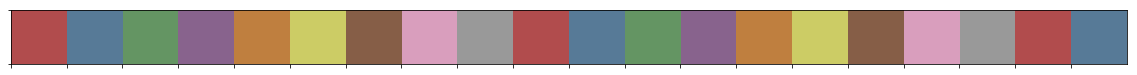

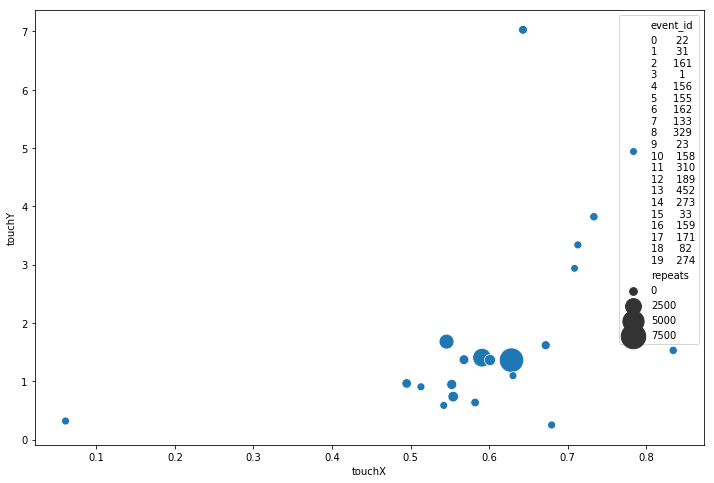

In [98]:
#group['#events'] = np.log2(group['repeats'])
#
#colors = {1:'red', 452:'blue', 133:'yellow', 329:'orange', 273:'Accent', 274:'Greys', 82:'red', 22:'red', 23:'red', 155:'red', 156:'red', 158:'red', 159:'red', 31:'red', 33:'red', 161:'red', 162:'red', 171:'red', 310:'red', 189:'red'}
colors = sns.palplot(sns.color_palette("Set1", n_colors=20, desat=.5))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_xlabel('coordenada X')
ax.set_ylabel('coordenada Y')
sns.scatterplot(x="touchX", y="touchY", hue="event_id", ax=ax, size="repeats", palette=colors, sizes=(60,600), data=group)

#plt.scatter(group.touchX, group.touchY, s=group['repeats'], c=colors, alpha=0.5)